# Работа 5

In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_curve, roc_curve



## Задание 5_1

### загрузка данных -> Разделение на обучающую и тестовую выборки -> Логистическая регрессия

In [15]:
data = pd.read_csv('diabetes.csv')
X = data.drop('Outcome', axis=1)
y = data['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
y_pred_log = log_reg.predict(X_test)

### Решающее дерево -> Вычисление метрик

In [16]:
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)

def print_metrics(y_true, y_pred, model_name):
    print(f"Метрики для {model_name}:")
    print(f"Accuracy: {accuracy_score(y_true, y_pred):.3f}")
    print(f"Precision: {precision_score(y_true, y_pred):.3f}")
    print(f"Recall: {recall_score(y_true, y_pred):.3f}")
    print(f"F1-score: {f1_score(y_true, y_pred):.3f}")
    print(f"ROC-AUC: {roc_auc_score(y_true, y_pred):.3f}\n")

print_metrics(y_test, y_pred_log, "логистической регрессии")
print_metrics(y_test, y_pred_tree, "решающего дерева")

Метрики для логистической регрессии:
Accuracy: 0.736
Precision: 0.617
Recall: 0.625
F1-score: 0.621
ROC-AUC: 0.710

Метрики для решающего дерева:
Accuracy: 0.701
Precision: 0.556
Recall: 0.688
F1-score: 0.615
ROC-AUC: 0.698



**По метрикам можно сделать вывод, что логистическая регрессия показывает себя немного лучше на данном датасете**

__выбираем F1-score для оценки модели, потому что он учитвыает в себе как точность, так и полноту__

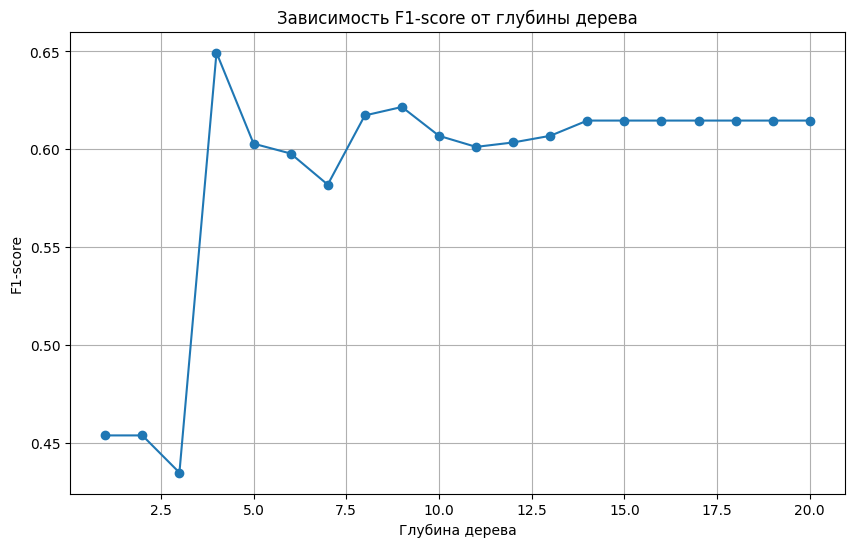

In [17]:
max_depths = range(1, 21)
f1_scores = []

for depth in max_depths:
    tree = DecisionTreeClassifier(max_depth=depth, random_state=42)
    tree.fit(X_train, y_train)
    y_pred = tree.predict(X_test)
    f1_scores.append(f1_score(y_test, y_pred))

plt.figure(figsize=(10, 6))
plt.plot(max_depths, f1_scores, marker='o')
plt.title('Зависимость F1-score от глубины дерева')
plt.xlabel('Глубина дерева')
plt.ylabel('F1-score')
plt.grid()
plt.show()

__График показывает, что оптимальная глубина дерева для данного датасета находится в диапазоне 3-5, после чего метрика начинает колебаться и снижается__

### Отрисуем получившееся дерево для модели с оптимальной глубиной

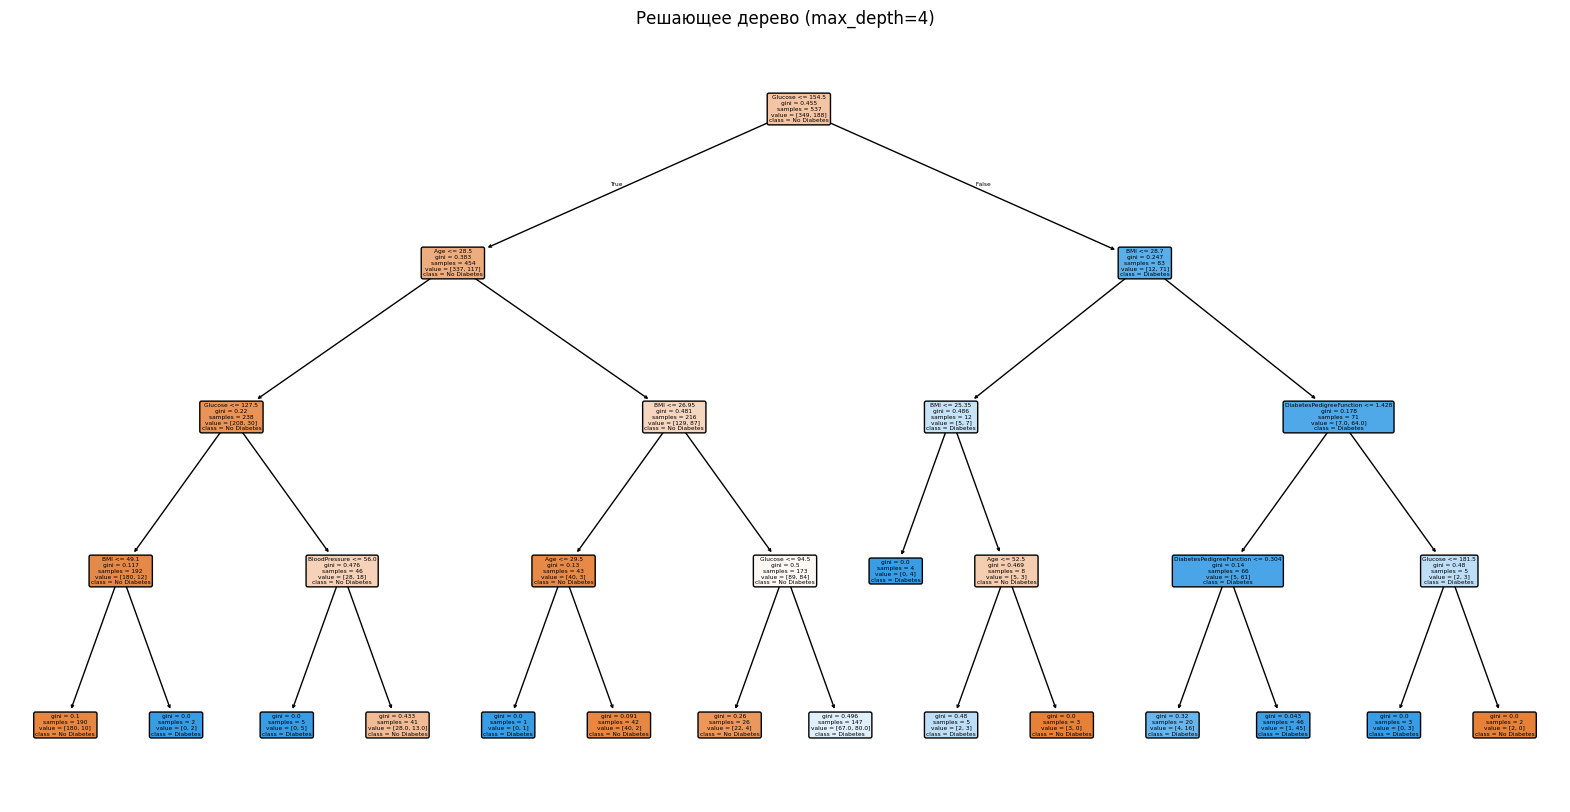

In [20]:
plt.figure(figsize=(20, 10))
plot_tree(optimal_tree, 
          feature_names=X.columns,
          class_names=['No Diabetes', 'Diabetes'],
          filled=True, 
          rounded=True)
plt.title("Решающее дерево (max_depth=4)")
plt.show()


### Важность признакоы

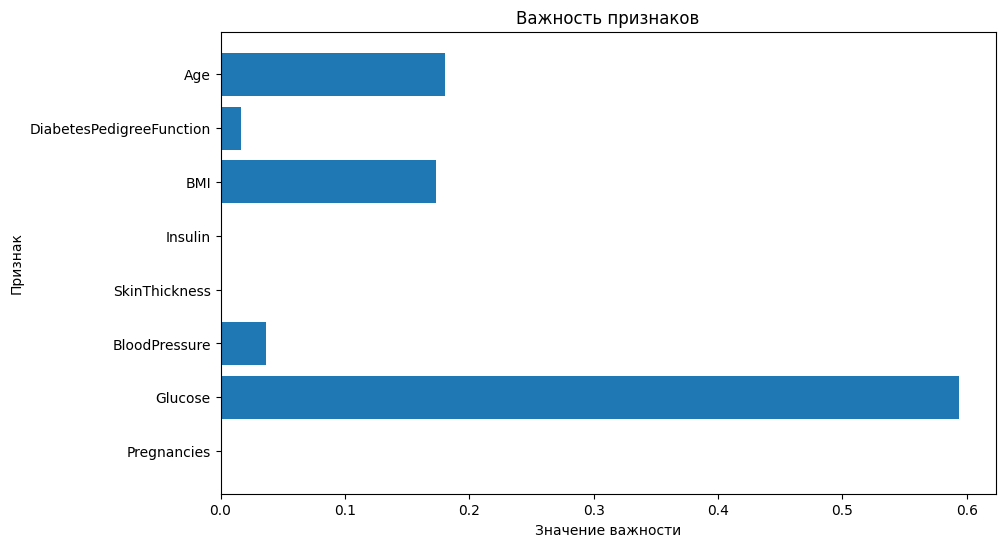

In [22]:
plt.figure(figsize=(10, 6))
plt.barh(X.columns, optimal_tree.feature_importances_)
plt.title('Важность признаков')
plt.xlabel('Значение важности')
plt.ylabel('Признак')
plt.show()


### PR и ROC кривые

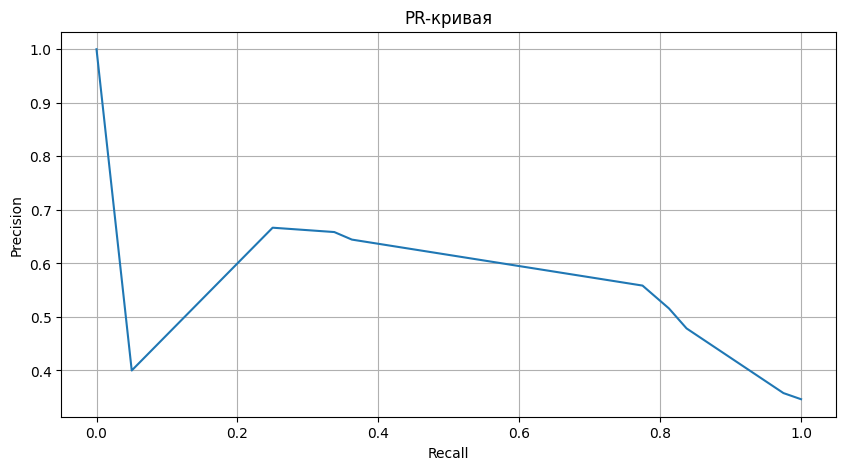

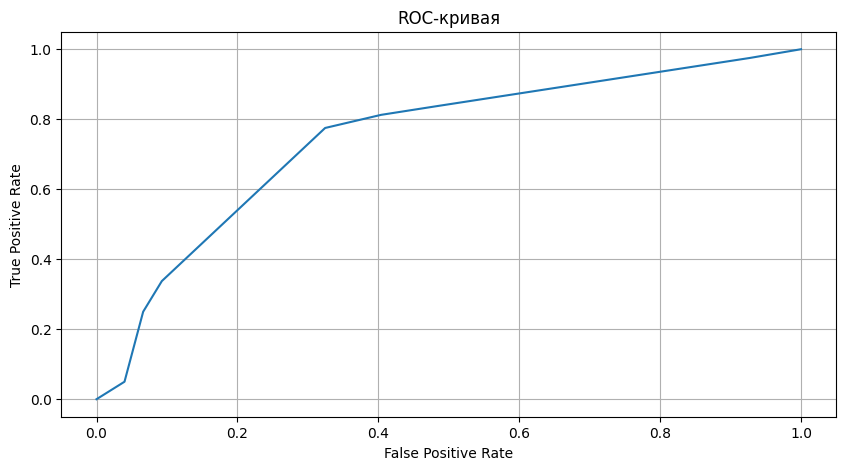

In [23]:
y_proba = optimal_tree.predict_proba(X_test)[:, 1]

precision, recall, _ = precision_recall_curve(y_test, y_proba)
plt.figure(figsize=(10, 5))
plt.plot(recall, precision)
plt.title('PR-кривая')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.grid()
plt.show()

fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure(figsize=(10, 5))
plt.plot(fpr, tpr)
plt.title('ROC-кривая')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid()
plt.show()

## Задание 5_2

### Исследование качества модели в зависимости от глубины деревьев (в качетсве кретерия взьмем тот же f1-score)

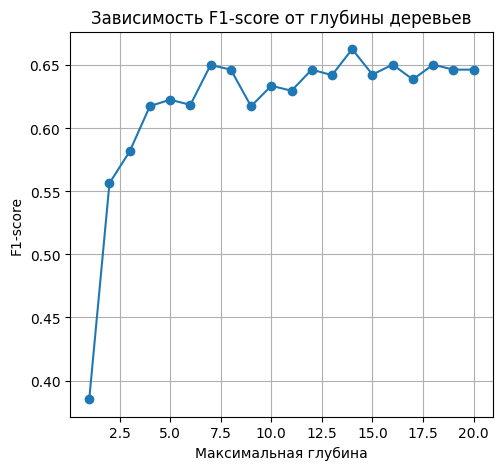

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
import time

data = pd.read_csv('diabetes.csv')
X = data.drop('Outcome', axis=1)
y = data['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

max_depths = range(1, 21)
f1_scores_depth = []
times_depth = []

for depth in max_depths:
    rf = RandomForestClassifier(max_depth=depth, n_estimators=100, random_state=42)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    f1_scores_depth.append(f1_score(y_test, y_pred))

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(max_depths, f1_scores_depth, marker='o')
plt.title('Зависимость F1-score от глубины деревьев')
plt.xlabel('Максимальная глубина')
plt.ylabel('F1-score')
plt.grid()

### Исследование зависимости от количества признаков

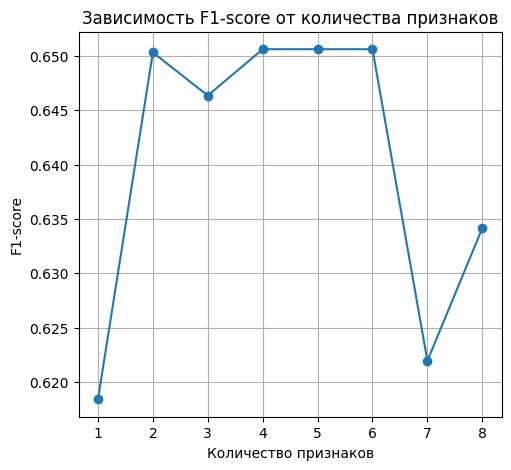

In [27]:
max_features = range(1, X.shape[1]+1)
f1_scores_features = []
times_features = []

for n in max_features:
    rf = RandomForestClassifier(max_features=n, n_estimators=100, random_state=42)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    f1_scores_features.append(f1_score(y_test, y_pred))

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(max_features, f1_scores_features, marker='o')
plt.title('Зависимость F1-score от количества признаков')
plt.xlabel('Количество признаков')
plt.ylabel('F1-score')
plt.xticks(max_features)
plt.grid()

### Исследование зависимости от количества деревьев

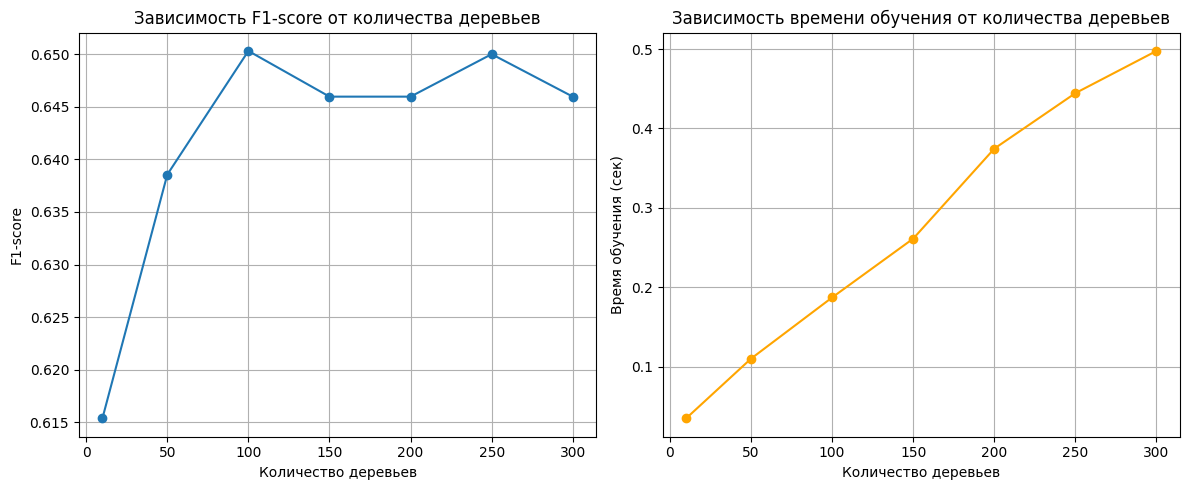

In [29]:
n_estimators = [10, 50, 100, 150, 200, 250, 300]
f1_scores_trees = []
times_trees = []

for n in n_estimators:
    start_time = time.time()
    rf = RandomForestClassifier(n_estimators=n, random_state=42)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    f1_scores_trees.append(f1_score(y_test, y_pred))
    times_trees.append(time.time() - start_time)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(n_estimators, f1_scores_trees, marker='o')
plt.title('Зависимость F1-score от количества деревьев')
plt.xlabel('Количество деревьев')
plt.ylabel('F1-score')
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(n_estimators, times_trees, marker='o', color='orange')
plt.title('Зависимость времени обучения от количества деревьев')
plt.xlabel('Количество деревьев')
plt.ylabel('Время обучения (сек)')
plt.grid()
plt.tight_layout()
plt.show()


## 

### подзадание 2 (используем XGBoost)

In [30]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report

__Базовые параметры__

In [32]:
xgb = XGBClassifier(random_state=42)
start_time = time.time()
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)
xgb_time = time.time() - start_time

print("Базовые параметры XGBoost:")
print(classification_report(y_test, y_pred))
print(f"Время обучения: {xgb_time:.3f} сек\n")

Базовые параметры XGBoost:
              precision    recall  f1-score   support

           0       0.81      0.77      0.79       151
           1       0.60      0.65      0.62        80

    accuracy                           0.73       231
   macro avg       0.70      0.71      0.70       231
weighted avg       0.73      0.73      0.73       231

Время обучения: 0.157 сек



__подбор параметров__

In [33]:
best_params = {
    'n_estimators': 150,
    'max_depth': 3,
    'learning_rate': 0.1,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'reg_alpha': 0.1,
    'reg_lambda': 1,
    'booster': 'gbtree'
}

xgb_tuned = XGBClassifier(**best_params, random_state=42)
start_time = time.time()
xgb_tuned.fit(X_train, y_train)
y_pred_tuned = xgb_tuned.predict(X_test)
xgb_tuned_time = time.time() - start_time

print("Настроенные параметры XGBoost:")
print(classification_report(y_test, y_pred_tuned))
print(f"Время обучения: {xgb_tuned_time:.3f} сек")

Настроенные параметры XGBoost:
              precision    recall  f1-score   support

           0       0.82      0.75      0.79       151
           1       0.60      0.69      0.64        80

    accuracy                           0.73       231
   macro avg       0.71      0.72      0.71       231
weighted avg       0.74      0.73      0.74       231

Время обучения: 0.102 сек


__Сравнение__

In [35]:
rf_best = RandomForestClassifier(n_estimators=150, max_depth=5, random_state=42)
start_time = time.time()
rf_best.fit(X_train, y_train)
y_pred_rf = rf_best.predict(X_test)
rf_time = time.time() - start_time

print("\nСравнение с лучшей моделью:")
print(classification_report(y_test, y_pred_rf))
print(f"Время обучения: {rf_time:.3f} сек")


Сравнение с лучшей моделью:
              precision    recall  f1-score   support

           0       0.79      0.83      0.81       151
           1       0.65      0.59      0.62        80

    accuracy                           0.75       231
   macro avg       0.72      0.71      0.72       231
weighted avg       0.74      0.75      0.75       231

Время обучения: 0.237 сек


__XGBoost показывает немного лучшие результаты по метрикам F1-score и точности__